### Installing Libraries

In [1]:
!pip install translators --upgrade --quiet

### Importing Libraries

In [53]:
import pandas as pd
from collections import Counter
import ast
import kaleido
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
import re
from io import StringIO
from html.parser import HTMLParser
import concurrent.futures
from utils import translate
from multiprocessing import Pool

### Importing Data

In [18]:
train_final = pd.read_csv('train_final.csv')
train_final['cell_types_shuffled'] = train_final['cell_types_shuffled'].apply(ast.literal_eval)
train_final['code_markdowns_shuffled'] = train_final['code_markdowns_shuffled'].apply(ast.literal_eval)

test_final = pd.read_csv('test_final.csv')
test_final['cell_types_shuffled'] = test_final['cell_types_shuffled'].apply(ast.literal_eval)
test_final['code_markdowns_shuffled'] = test_final['code_markdowns_shuffled'].apply(ast.literal_eval)

In [19]:
train_final_exploded = train_final.explode(['cell_types_shuffled',
                                            'code_markdowns_shuffled']).reset_index(drop=True)

In [73]:
train_final_exploded

id cell_types_shuffled  \
0        00001756c60be8                code   
1        00001756c60be8                code   
2        00001756c60be8                code   
3        00001756c60be8                code   
4        00001756c60be8                code   
...                 ...                 ...   
6370641  fffe1d764579d5            markdown   
6370642  fffe1d764579d5            markdown   
6370643  fffe1d764579d5            markdown   
6370644  fffe1d764579d5            markdown   
6370645  fffe1d764579d5            markdown   

                                   code_markdowns_shuffled  \
0        # This Python 3 environment comes with many he...   
1        import numpy as np\nimport pandas as pd\nimpor...   
2        import warnings\nwarnings.filterwarnings('igno...   
3            matplotlib.rcParams.update({'font.size': 14})   
4        def evaluate_preds(train_true_values, train_pr...   
...                                                    ...   
6370641                              REMOVING THE OUTLIERS   
6370642                              DIMENSIONALITY CURSE    
6370643                  BANGALORE HOUSE PRICE PREDICTION    
6370644   We have achieved 75.2 accuracy in predicting ...   
6370645                                    DATA INGESTION    

                                             cell_shuffled  \
0        1862f0a6 2a9e43d6 038b763d 2eefe0ef 0beab1cd 9...   
1        1862f0a6 2a9e43d6 038b763d 2eefe0ef 0beab1cd 9...   
2        1862f0a6 2a9e43d6 038b763d 2eefe0ef 0beab1cd 9...   
3        1862f0a6 2a9e43d6 038b763d 2eefe0ef 0beab1cd 9...   
4        1862f0a6 2a9e43d6 038b763d 2eefe0ef 0beab1cd 9...   
...                                                    ...   
6370641  9c3b96a5 1398a873 f71c538e 8b44a5e8 385dff7a b...   
6370642  9c3b96a5 1398a873 f71c538e 8b44a5e8 385dff7a b...   
6370643  9c3b96a5 1398a873 f71c538e 8b44a5e8 385dff7a b...   
6370644  9c3b96a5 1398a873 f71c538e 8b44a5e8 385dff7a b...   
6370645  9c3b96a5 1398a873 f71c538e 8b44a5e8 385dff7a b...   

                                                cell_order markdown_language  \
0        1862f0a6 448eb224 2a9e43d6 7e2f170a 038b763d 7...                ru   
1        1862f0a6 448eb224 2a9e43d6 7e2f170a 038b763d 7...                ru   
2        1862f0a6 448eb224 2a9e43d6 7e2f170a 038b763d 7...                ru   
3        1862f0a6 448eb224 2a9e43d6 7e2f170a 038b763d 7...                ru   
4        1862f0a6 448eb224 2a9e43d6 7e2f170a 038b763d 7...                ru   
...                                                    ...               ...   
6370641  1a63248d 9c3b96a5 1398a873 4e2d4c2d f71c538e 8...                en   
6370642  1a63248d 9c3b96a5 1398a873 4e2d4c2d f71c538e 8...                en   
6370643  1a63248d 9c3b96a5 1398a873 4e2d4c2d f71c538e 8...                en   
6370644  1a63248d 9c3b96a5 1398a873 4e2d4c2d f71c538e 8...                en   
6370645  1a63248d 9c3b96a5 1398a873 4e2d4c2d f71c538e 8...                en   

        ancestor_id parent_id  
0          945aea18       NaN  
1          945aea18       NaN  
2          945aea18       NaN  
3          945aea18       NaN  
4          945aea18       NaN  
...             ...       ...  
6370641    3c40bfa6       NaN  
6370642    3c40bfa6       NaN  
6370643    3c40bfa6       NaN  
6370644    3c40bfa6       NaN  
6370645    3c40bfa6       NaN  

[6370646 rows x 8 columns]

In [37]:
nonenglish_markdowns = list(train_final_exploded.query('cell_types_shuffled == "markdown" & markdown_language != "en"')['code_markdowns_shuffled'])

In [71]:
%%time
if __name__ == '__main__':
    with Pool(10) as p:
        translated_markdowns = p.map(translate, nonenglish_markdowns[:1000])

Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.
Using state Massachusetts server backend.


CPU times: user 59.2 ms, sys: 132 ms, total: 191 ms
Wall time: 2min 8s


In [72]:
(len(nonenglish_markdowns)/1000)*128/60/60

5.9341511111111105

### Exploratory Data Analysis

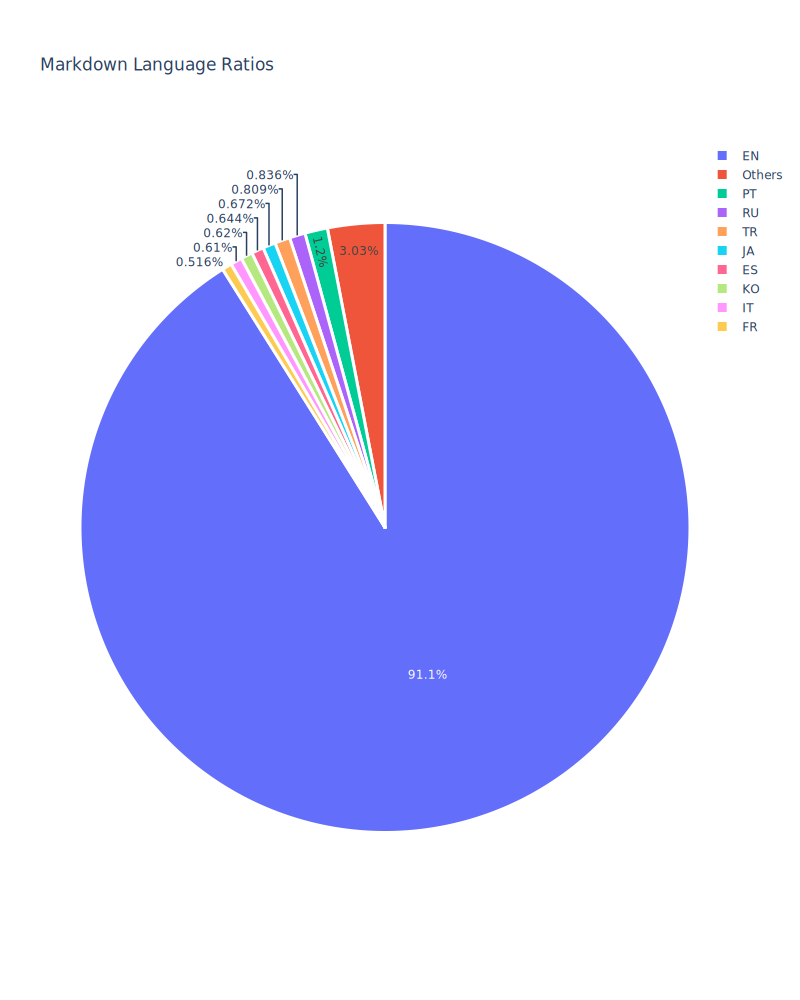

In [6]:
top_n = 9

language_counts = train_final['markdown_language'].value_counts()

top_n_languages = language_counts[:top_n]
other_languages = language_counts[top_n:]

language_counts_grouped = pd.DataFrame(top_n_languages).reset_index()
language_counts_grouped.columns = ['markdown_language', 'counts']
language_counts_grouped['markdown_language'] = language_counts_grouped['markdown_language'].apply(lambda x: x.upper())
language_counts_grouped.loc[top_n+1] = ['Others', sum(other_languages.values)]


fig = px.pie(language_counts_grouped, 
             values='counts', 
             names='markdown_language',
             width=800, 
             height=1000,
             title='Markdown Language Ratios')

fig.update_traces(textinfo='percent',
                  marker=dict(line=dict(color='white', width=3)))

fig.update_traces()

fig.show('svg')

In [ ]:
line_counts_codes_list = []
line_counts_markdowns_list = []

for r in range(train_final.shape[0]): 
    codes_line_list = ''.join(train_final['codes'][r]).split('\n')
    codes_line_list = [val for val in codes_line_list if val != '']
    line_counts_codes = len(codes_line_list)
    
    markdowns_line_list = ''.join(train_final['markdowns_cleaned'][r]).split('\n')
    markdowns_line_list = [val for val in markdowns_line_list if val != '']
    line_counts_markdowns = len(markdowns_line_list)
    
    line_counts_codes_list.append(line_counts_codes)
    line_counts_markdowns_list.append(line_counts_markdowns)
    
line_counts_codes_list = np.array(line_counts_codes_list)    
line_counts_markdowns_list = np.array(line_counts_markdowns_list)    

In [ ]:
train_final['codes_line_counts'] = line_counts_codes_list
train_final['markdowns_line_counts'] = line_counts_markdowns_list

In [ ]:
fig = go.Figure()
fig.add_trace(go.Box(y=line_counts_codes_list, 
                     name = 'Number of Lines (Codes)',
                     marker_color = 'indianred'))

fig.add_trace(go.Box(y=line_counts_markdowns_list,
                     name = 'Number of Lines (Markdowns)',
                     marker_color = 'lightseagreen'))

fig.update_layout(template = 'plotly_white',
                  width=1000,
                  height=600,
                  title="Distribution of the Number of Lines")
    

fig.show('svg')

In [ ]:
n = 1
n_line_markdown_ratio = np.mean(line_counts_markdowns_list<=n)
n_line_markdown_ratio = np.round(n_line_markdown_ratio, 2)

print("The ratio of notebooks that have lower than or equal to {} line(s) in their markdowns: {}".format(n, n_line_markdown_ratio))

In [ ]:
x = list(range(1,26))
y = [np.mean(line_counts_markdowns_list<=n) for n in x]

fig = go.Figure([go.Bar(x=x, y=y)])

fig.update_traces(marker_color='rgb(158,202,225)', 
                  marker_line_color='white',
                  marker_line_width=0.50, opacity=1)

fig.update_layout(template='plotly_white',
                  width=1000,
                  height=600,
                  title="Cumulative Bar Chart",
                  xaxis_title="Number of Lines",
                  yaxis_title="Ratio of Notebooks")

fig.update_xaxes(showline=True, 
                 showgrid=True, 
                 gridwidth=1.5, 
                 linewidth=2, 
                 nticks = max(x)+1)

fig.update_yaxes(showline=True, 
                 showgrid=True, 
                 gridwidth=1.5, 
                 linewidth=2, 
                 nticks=11,
                 range = [0,1])

fig.show('svg')

In [ ]:
line_counts_codes_sorted = pd.Series(line_counts_codes_list).sort_values(ascending=False)
long_codes_indices = line_counts_codes_sorted[line_counts_codes_sorted>100].index.tolist()

line_counts_markdowns_sorted = pd.Series(line_counts_markdowns_list).sort_values(ascending=False)
long_markdowns_indices = line_counts_markdowns_sorted[line_counts_markdowns_sorted>100].index.tolist()

In [ ]:
long_markdown = train_final['markdowns_cleaned'][long_markdowns_indices[398]][:3]
long_markdown_joined = '\n'.join(long_markdown)

print(long_markdown_joined)

In [ ]:
def translate(texts):
    translated_texts = [ts.google(val) for val in texts]
    return translated_texts

In [ ]:
# nonenglish_index = train_final['language']!='en'

In [ ]:
# train_final['markdowns_translated'] = None

In [ ]:
# train_final.loc[~nonenglish_index, 'markdowns_translated'] = train_final['markdowns_cleaned'][~nonenglish_index].values

In [ ]:
# from tqdm import tqdm
# tqdm.pandas()
# train_final.loc[nonenglish_index, 'markdowns_translated'] = train_final['markdowns_cleaned'][nonenglish_index].progress_apply(translate).values

In [ ]:
for val in range(len(markdowns)):
    print(markdowns[val])
    print()
    print('---------')
    print()
    print(translated_markdowns[val])
    print()
    print('#########')
    print()

In [ ]:
# ANCESTRY (?)